<a href="https://colab.research.google.com/github/gongx030/Etv2_pioneer/blob/master/Etv2_pathway_MEF_clusters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The goal of this notebook is to look at the enriched pathways in cluster 1 and 2 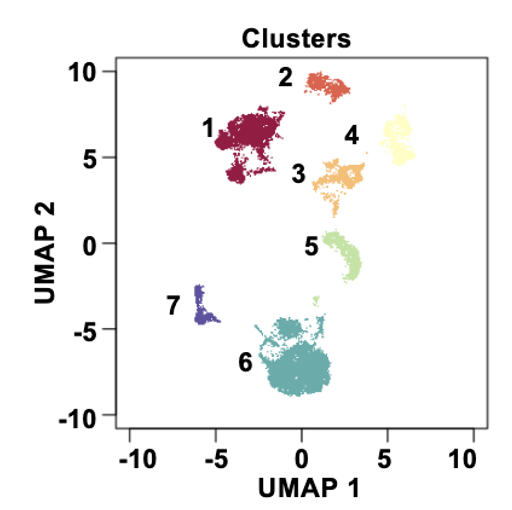

In [1]:
start_time0 <- Sys.time()

### Install R packages

In [2]:
if (!requireNamespace("BiocManager", quietly = TRUE))
  install.packages("BiocManager")
BiocManager::install(c(
  'SummarizedExperiment', 'rhdf5', 'SingleCellExperiment', 'limma', 'goseq', 
  'stringr', 'ggplot2', 'TxDb.Mmusculus.UCSC.mm10.knownGene', 'org.Mm.eg.db',
  'wordcloud', 'plotrix', 'DESeq2','fgsea','cowplot'
), Ncpus = 2)
install.packages(c('farver', "Seurat"), Ncpus = 2)
install.packages('devtools')
devtools::install_github('rstudio/reticulate')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


Bioconductor version 3.13 (BiocManager 1.30.16), R 4.1.0 (2021-05-18)

Warning message:
“package(s) not installed when version(s) same as current; use `force = TRUE` to
  re-install: 'stringr'”
Installing package(s) 'BiocVersion', 'SummarizedExperiment', 'rhdf5',
  'SingleCellExperiment', 'limma', 'goseq', 'ggplot2',
  'TxDb.Mmusculus.UCSC.mm10.knownGene', 'org.Mm.eg.db', 'wordcloud', 'plotrix',
  'DESeq2', 'fgsea', 'cowplot'

also installing the dependencies ‘Rhtslib’, ‘rjson’, ‘bit’, ‘filelock’, ‘formatR’, ‘zlibbioc’, ‘bitops’, ‘XML’, ‘Rsamtools’, ‘GenomicAlignments’, ‘restfulr’, ‘bit64’, ‘plogr’, ‘png’, ‘BiocFileCache’, ‘lambda.r’, ‘futile.options’, ‘xtable’, ‘matrixStats’, ‘XVector’, ‘RCurl’, ‘GenomeInfoDbData’, ‘rtracklayer’, ‘RSQLite’, ‘KE

here (NA -> 1.0.1) [CRAN]


Installing 1 packages: here

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



✔  checking for file ‘/tmp/RtmpUXoAbS/remotes4c74898b05/rstudio-reticulate-2e1bf2f/DESCRIPTION’
─  preparing ‘reticulate’:
✔  checking DESCRIPTION meta-information
─  cleaning src
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  building ‘reticulate_1.20-9001.tar.gz’
   


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
devtools::install_github('YuLab-SMU/ChIPseeker')

enrichplot   (NA    -> 600ea8573...) [GitHub]
openssl      (1.4.3 -> 1.4.4       ) [CRAN]
mime         (0.10  -> 0.11        ) [CRAN]
curl         (4.3.1 -> 4.3.2       ) [CRAN]
dplyr        (1.0.6 -> 1.0.7       ) [CRAN]
colorspace   (2.0-1 -> 2.0-2       ) [CRAN]
cpp11        (0.2.7 -> 0.3.1       ) [CRAN]
treeio       (NA    -> 1.16.1      ) [CRAN]
tidytree     (NA    -> 0.3.4       ) [CRAN]
rvcheck      (NA    -> 0.1.8       ) [CRAN]
aplot        (NA    -> 0.0.6       ) [CRAN]
ape          (NA    -> 5.5         ) [CRAN]
tweenr       (NA    -> 1.0.2       ) [CRAN]
ggforce      (NA    -> 0.3.3       ) [CRAN]
graphlayouts (NA    -> 0.7.1       ) [CRAN]
tidygraph    (NA    -> 1.2.0       ) [CRAN]
viridis      (NA    -> 0.6.1       ) [CRAN]
qvalue       (NA    -> 2.24.0      ) [CRAN]
GOSemSim     (NA    -> 2.18.0      ) [CRAN]
DO.db        (NA    -> 2.9         ) [CRAN]
ggtree       (NA    -> 3.0.2       ) [CRAN]
shadowtext   (NA    -> 0.0.8       ) [CRAN]
scatterpie   (NA    -> 0.1.6  

tidytree     (NA    -> 0.3.4 ) [CRAN]
dplyr        (1.0.6 -> 1.0.7 ) [CRAN]
ape          (NA    -> 5.5   ) [CRAN]
colorspace   (2.0-1 -> 2.0-2 ) [CRAN]
openssl      (1.4.3 -> 1.4.4 ) [CRAN]
mime         (0.10  -> 0.11  ) [CRAN]
curl         (4.3.1 -> 4.3.2 ) [CRAN]
cpp11        (0.2.7 -> 0.3.1 ) [CRAN]
tweenr       (NA    -> 1.0.2 ) [CRAN]
treeio       (NA    -> 1.16.1) [CRAN]
rvcheck      (NA    -> 0.1.8 ) [CRAN]
aplot        (NA    -> 0.0.6 ) [CRAN]
ggforce      (NA    -> 0.3.3 ) [CRAN]
graphlayouts (NA    -> 0.7.1 ) [CRAN]
tidygraph    (NA    -> 1.2.0 ) [CRAN]
viridis      (NA    -> 0.6.1 ) [CRAN]
qvalue       (NA    -> 2.24.0) [CRAN]
GOSemSim     (NA    -> 2.18.0) [CRAN]
DO.db        (NA    -> 2.9   ) [CRAN]
ggtree       (NA    -> 3.0.2 ) [CRAN]
shadowtext   (NA    -> 0.0.8 ) [CRAN]
scatterpie   (NA    -> 0.1.6 ) [CRAN]
ggraph       (NA    -> 2.0.5 ) [CRAN]
DOSE         (NA    -> 3.18.1) [CRAN]


Installing 24 packages: tidytree, dplyr, ape, colorspace, openssl, mime, curl, cpp11, tweenr, treeio, rvcheck, aplot, ggforce, graphlayouts, tidygraph, viridis, qvalue, GOSemSim, DO.db, ggtree, shadowtext, scatterpie, ggraph, DOSE

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



✔  checking for file ‘/tmp/RtmpUXoAbS/remotes4c507f8f0e/YuLab-SMU-enrichplot-600ea85/DESCRIPTION’
─  preparing ‘enrichplot’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
   Omitted ‘LazyData’ from DESCRIPTION
─  building ‘enrichplot_1.13.0.993.tar.gz’
   


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing 25 packages: openssl, mime, curl, dplyr, colorspace, cpp11, treeio, tidytree, rvcheck, aplot, ape, tweenr, ggforce, graphlayouts, tidygraph, viridis, qvalue, GOSemSim, DO.db, ggtree, shadowtext, scatterpie, ggraph, DOSE, TxDb.Hsapiens.UCSC.hg19.knownGene

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Skipping install of 'enrichplot' from a github remote, the SHA1 (600ea857) has not changed since last install.
  Use `force = TRUE` to force installation



✔  checking for file ‘/tmp/RtmpUXoAbS/remotes4c6cc8c3b0/YuLab-SMU-ChIPseeker-22b91f3/DESCRIPTION’
─  preparing ‘ChIPseeker’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  looking to see if a ‘data/datalist’ file should be added
─  building ‘ChIPseeker_1.29.1.tar.gz’ (2.3s)
   


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [4]:
library(ChIPseeker)



ChIPseeker v1.29.1  For help: https://guangchuangyu.github.io/software/ChIPseeker

If you use ChIPseeker in published research, please cite:
Guangchuang Yu, Li-Gen Wang, Qing-Yu He. ChIPseeker: an R/Bioconductor package for ChIP peak annotation, comparison and visualization. Bioinformatics 2015, 31(14):2382-2383



In [8]:
BiocManager::install('clusterProfiler')

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


Bioconductor version 3.13 (BiocManager 1.30.16), R 4.1.0 (2021-05-18)

Installing package(s) 'clusterProfiler'

also installing the dependency ‘downloader’


Old packages: 'broom', 'colorspace', 'cpp11', 'curl', 'dplyr', 'gert',
  'ggplot2', 'mime', 'openssl', 'rmarkdown', 'testthat', 'xfun'



In [9]:
library(clusterProfiler)

clusterProfiler v4.0.0  For help: https://guangchuangyu.github.io/software/clusterProfiler

If you use clusterProfiler in published research, please cite:
Guangchuang Yu, Li-Gen Wang, Yanyan Han, Qing-Yu He. clusterProfiler: an R package for comparing biological themes among gene clusters. OMICS: A Journal of Integrative Biology. 2012, 16(5):284-287.


Attaching package: ‘clusterProfiler’


The following object is masked from ‘package:AnnotationDbi’:

    select


The following objects are masked from ‘package:plyr’:

    arrange, mutate, rename, summarise


The following object is masked from ‘package:IRanges’:

    slice


The following object is masked from ‘package:S4Vectors’:

    rename


The following object is masked from ‘package:stats’:

    filter




In [19]:
BiocManager::install('SingleCellExperiment')
library(SingleCellExperiment)

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


Bioconductor version 3.13 (BiocManager 1.30.16), R 4.1.0 (2021-05-18)

Warning message:
“package(s) not installed when version(s) same as current; use `force = TRUE` to
  re-install: 'SingleCellExperiment'”
Old packages: 'broom', 'colorspace', 'cpp11', 'curl', 'dplyr', 'gert',
  'ggplot2', 'mime', 'openssl', 'rmarkdown', 'testthat', 'xfun'



In [99]:
BiocManager::install('ggsci')
library(ggsci)

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


Bioconductor version 3.13 (BiocManager 1.30.16), R 4.1.0 (2021-05-18)

Installing package(s) 'ggsci'

Old packages: 'broom', 'colorspace', 'cpp11', 'curl', 'dplyr', 'gert',
  'ggplot2', 'mime', 'openssl', 'rmarkdown', 'testthat', 'xfun'



In [10]:
library(SummarizedExperiment)
library(RColorBrewer)
library(plyr)
library(dplyr)
library(parallel)
library(ggplot2)
library(goseq)
library(stringr)
library(TxDb.Mmusculus.UCSC.mm10.knownGene)
library(org.Mm.eg.db)
library(wordcloud)
library(plotrix)
library(DESeq2)
library(fgsea)
library(cowplot)

In [11]:
library(tidyverse)
library(magrittr)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.2     ✔ purrr   0.3.4
✔ tidyr   1.1.3     ✔ forcats 0.5.1
✔ readr   1.4.0     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ clusterProfiler::arrange()   masks dplyr::arrange(), plyr::arrange()
✖ dplyr::collapse()            masks IRanges::collapse()
✖ dplyr::combine()             masks Biobase::combine(), BiocGenerics::combine()
✖ purrr::compact()             masks plyr::compact()
✖ dplyr::count()               masks plyr::count(), matrixStats::count()
✖ dplyr::desc()                masks plyr::desc(), IRanges::desc()
✖ tidyr::expand()              masks S4Vectors::expand()
✖ dplyr::failwith()            masks plyr::failwith()
✖ clusterProfiler::filter()    masks dplyr::filter(), stats::filter()
✖ dplyr::first()               masks S4Vectors::first()
✖ 

In [12]:
BiocManager::install(c(
  'fgsea','cowplot'
))

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


Bioconductor version 3.13 (BiocManager 1.30.16), R 4.1.0 (2021-05-18)

Warning message:
“package(s) not installed when version(s) same as current; use `force = TRUE` to
  re-install: 'fgsea' 'cowplot'”
Old packages: 'broom', 'colorspace', 'cpp11', 'curl', 'dplyr', 'gert',
  'ggplot2', 'mime', 'openssl', 'rmarkdown', 'testthat', 'xfun'



## Load processed scRNA-seq data

In [13]:
se_file <- c(
  "sce" = "https://s3.msi.umn.edu/gongx030/etv2_pioneer/data/processed_Etv2_scRNAseq.rds")

In [14]:
for (i in 1:length(se_file)){
  sprintf('wget -x -c -nH %s', se_file[i]) %>% system()
}
se_file <- gsub('https://s3.msi.umn.edu/', './', se_file)
message(sprintf('all se_file exist: %s', all(file.exists(se_file))))

all se_file exist: TRUE



In [15]:
se <- lapply(se_file, function(s){s %>%
  readRDS()})

In [16]:
sce <- se$sce


## Determine the number of clusters by running k-means on the scVI latent space

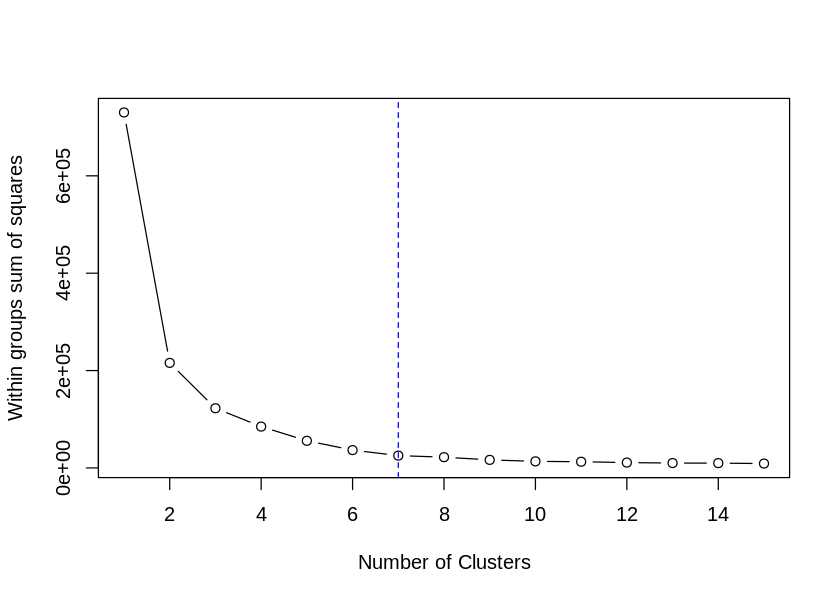

In [17]:
options(repr.plot.width = 10, repr.plot.height = 5)
wss <- (nrow(colData(sce)$umap)-1) * sum(apply(colData(sce)$umap, 2, var))
for (i in 2:15) wss[i] <- sum(kmeans(colData(sce)$umap,centers = i, nstart = 10)$withinss)
options(repr.plot.width=7, repr.plot.height=5)
plot(1:15, wss, type="b", xlab="Number of Clusters", ylab="Within groups sum of squares")
n_cluster <- 7
abline(v = n_cluster, col = 'blue', lty = 2)

In [18]:
set.seed(1)
# it is important to set nstart to a large number to get a relatively robust clustering result. 
cls <- kmeans(colData(sce)$umap, n_cluster, nstart = 100)$cluster
table(cls, colData(sce)$group)
cls <- as.numeric(factor(cls, c(4, 5, 2, 3, 1, 7, 6)))
table(cls, colData(sce)$group)

   
cls MEF_NoDox MEF_Dox_D1 MEF_Dox_D2 MEF_Dox_D7a MEF_Dox_D7b
  1         1          0         17        1493           3
  2         0          6       1443           1           0
  3         0          4       1435          23           0
  4      2878        541         21           2           3
  5       657        381          1           0           0
  6         0          2          0           1         813
  7        26         14         19        5682           8

   
cls MEF_NoDox MEF_Dox_D1 MEF_Dox_D2 MEF_Dox_D7a MEF_Dox_D7b
  1      2878        541         21           2           3
  2       657        381          1           0           0
  3         0          6       1443           1           0
  4         0          4       1435          23           0
  5         1          0         17        1493           3
  6        26         14         19        5682           8
  7         0          2          0           1         813

In [20]:
library(Seurat)

Registered S3 method overwritten by 'spatstat.geom':
  method     from
  print.boxx cli 

Attaching SeuratObject


Attaching package: ‘Seurat’


The following object is masked from ‘package:SummarizedExperiment’:

    Assays




# Converting Summarized experiment into a Seurat Objest

In [29]:
sce = as(sce, "SingleCellExperiment")
colData(sce)$cluster <- cls
print(sce)
rownames(sce) = rowData(sce)$name
colnames(sce)  = colData(sce)$barcodes
so = as.Seurat(sce, data = NULL)
so = CreateSeuratObject(counts = GetAssayData(so, slot = "counts"), meta.data = so@meta.data)
so[["percent.mt"]] = PercentageFeatureSet(so, pattern = "^mt-")
so[["percent.rpl"]] = PercentageFeatureSet(so, pattern = "^Rpl")
so[["percent.rps"]] = PercentageFeatureSet(so, pattern = "^Rps")
s.genes <- cc.genes$s.genes %>% str_to_title()
g2m.genes <- cc.genes$g2m.genes %>% str_to_title()
so <- CellCycleScoring(so, s.features = s.genes, g2m.features = g2m.genes, set.ident = TRUE)
rownames(sce) = rownames(so)
colnames(sce) = colnames(so)
so <- SetAssayData(object = so, slot = "scale.data", new.data = assays(sce)$scaled_counts) #Scaling
so <- SetAssayData(object = so, slot = "data", new.data = assays(sce)$normalized_counts) #Normalizing
so[["umap"]] <- CreateDimReducObject(embeddings = as.matrix(so@meta.data[,c("umap.V1", "umap.V2")]), key = "umap_", assay = DefaultAssay(so)) #assign UMAP calculated 
so

class: SingleCellExperiment 
dim: 17010 15475 
metadata(1): curves
assays(3): counts normalized_counts scaled_counts
rownames: NULL
rowData names(6): id name ... is_hvg clusters
colnames: NULL
colData names(7): barcodes group ... umap cluster
reducedDimNames(0):
mainExpName: NULL
altExpNames(0):


Warning message:
“Non-unique features (rownames) present in the input matrix, making unique”
Warning message:
“Non-unique cell names (colnames) present in the input matrix, making unique”
Warning message:
“The following features are not present in the object: Mlf1ip, not searching for symbol synonyms”
Warning message:
“The following features are not present in the object: Fam64a, Hn1, not searching for symbol synonyms”


An object of class Seurat 
17010 features across 15475 samples within 1 assay 
Active assay: RNA (17010 features, 0 variable features)
 1 dimensional reduction calculated: umap

## UMAP

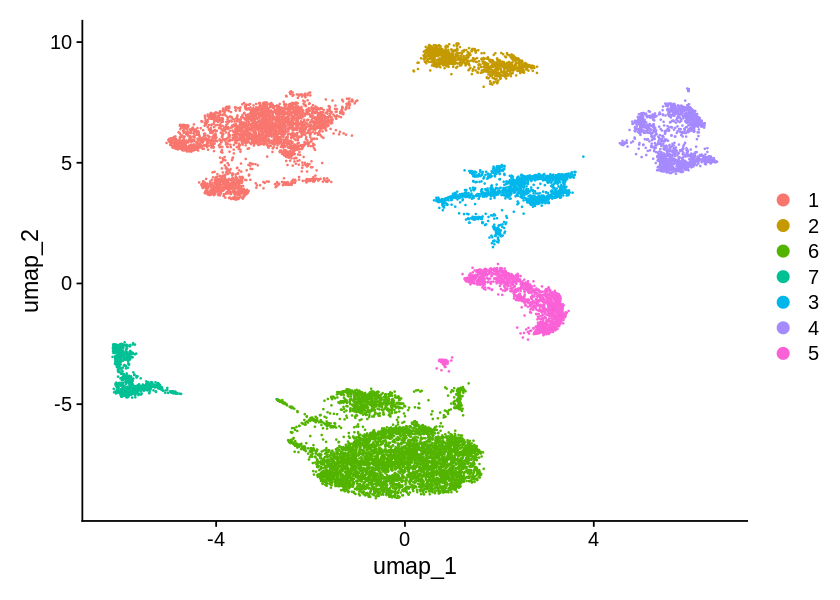

In [31]:
Idents(so) <- 'cluster'
DimPlot(so, reduction = "umap")

# Finding differntially expressed genes between cluster 1 & 2 

In [32]:
Clust1_2 = FindMarkers(so, ident.2 = 2, ident.1 = 1, test.use = "wilcox", only.pos = TRUE, min.pct = 0.1, logfc.threshold = 0.1)
Clust2_1 = FindMarkers(so, ident.2 = 1, ident.1 = 2, test.use = "wilcox", only.pos = TRUE, min.pct = 0.1, logfc.threshold = 0.1)

## Upregulated genes

In [33]:
# Cluster 1
up_1 <- Clust1_2 %>% 
        filter(p_val_adj < 0.05) %>%
        filter(avg_log2FC > 0.25)
# Cluster 2
up_2 <- Clust2_1 %>% 
        filter(p_val_adj < 0.05) %>%
        filter(avg_log2FC > 0.25)

# GO and KEGG enrichment for cluster 1

In [121]:
go_1 <- enrichGO(gene         = rownames(up_1),
                OrgDb         = org.Mm.eg.db,
                keyType       = 'SYMBOL',
                ont           = "Bp",
                pAdjustMethod = "BH",
                maxGSSize = 1000,
                pvalueCutoff  = 0.01,
                qvalueCutoff  = 0.05)

In [150]:
go_1

#
# over-representation test
#
#...@organism 	 Mus musculus 
#...@ontology 	 BP 
#...@keytype 	 SYMBOL 
#...@gene 	 chr [1:2262] "Col5a2" "Fn1" "Ptgs2" "Prrc2c" "Hspa5" "Itgav" "Cd44" "Bdnf" ...
#...pvalues adjusted by 'BH' with cutoff <0.01 
#...1911 enriched terms found
'data.frame':	1911 obs. of  9 variables:
 $ ID         : chr  "GO:0035239" "GO:0001944" "GO:0001568" "GO:0000278" ...
 $ Description: chr  "tube morphogenesis" "vasculature development" "blood vessel development" "mitotic cell cycle" ...
 $ GeneRatio  : chr  "236/2143" "208/2143" "200/2143" "207/2143" ...
 $ BgRatio    : chr  "947/23355" "788/23355" "753/23355" "836/23355" ...
 $ pvalue     : num  2.40e-48 9.87e-47 2.29e-45 7.09e-42 8.88e-39 ...
 $ p.adjust   : num  1.47e-44 3.02e-43 4.68e-42 1.09e-38 1.09e-35 ...
 $ qvalue     : num  8.08e-45 1.66e-43 2.57e-42 5.96e-39 5.98e-36 ...
 $ geneID     : chr  "Fn1/Ptgs2/Itgav/Cd44/Thbs1/Flna/Csf1/Tnc/Hmga2/Col4a1/Itgb1/Amotl2/Rtn4/Sparc/Sox4/Mtdh/Ywhaz/Col4a2/Pbrm1/Serp"| _

In [147]:
kegg_1 <- enrichKEGG(gene         = mapIds(org.Mm.eg.db, rownames(up_1), 'ENTREZID', 'SYMBOL'),
                organism         = 'mmu',
                #keyType       = 'SYMBOL',
                pAdjustMethod = "BH",
                #maxGSSize = 1000,
                pvalueCutoff  = 0.01,
                qvalueCutoff  = 0.05)

'select()' returned 1:1 mapping between keys and columns



## Pathway, cascade, development, regeneration terms that are enriched

In [148]:
pathway_kegg1 <- kegg_1 %>% 
                 filter(str_detect(Description, 'pathway|cascade|development|regeneration')) %>% 
                 filter(!str_detect(Description, 'negative|positive'))

#
# over-representation test
#
#...@organism 	 mmu 
#...@ontology 	 KEGG 
#...@keytype 	 kegg 
#...@gene 	 chr [1:2201] "12832" "14268" "19225" "226562" "14828" "16410" "12505" ...
#...pvalues adjusted by 'BH' with cutoff <0.01 
#...28 enriched terms found
'data.frame':	28 obs. of  9 variables:
 $ ID         : chr  "mmu04151" "mmu04010" "mmu04310" "mmu04012" ...
 $ Description: chr  "PI3K-Akt signaling pathway" "MAPK signaling pathway" "Wnt signaling pathway" "ErbB signaling pathway" ...
 $ GeneRatio  : chr  "82/979" "71/979" "49/979" "31/979" ...
 $ BgRatio    : chr  "359/8924" "294/8924" "168/8924" "84/8924" ...
 $ pvalue     : num  3.55e-11 5.46e-11 5.64e-11 3.37e-10 5.75e-10 ...
 $ p.adjust   : num  2.15e-09 2.44e-09 2.44e-09 1.28e-08 1.93e-08 ...
 $ qvalue     : num  1.26e-09 1.43e-09 1.43e-09 7.50e-09 1.14e-08 ...
 $ geneID     : chr  "14268/16410/12064/21825/12977/21923/12843/16001/22027/12826/16412/12842/22631/12827/19052/12835/14062/19211/109"| __truncated__ "12064/192176/1297

# GO and KEGG enrichment for cluster 2

In [120]:
go_2 <- enrichGO(gene         = rownames(up_2),
                OrgDb         = org.Mm.eg.db,
                keyType       = 'SYMBOL',
                ont           = "Bp",
                pAdjustMethod = "BH",
                maxGSSize = 1000,
                pvalueCutoff  = 0.01,
                qvalueCutoff  = 0.05)

In [123]:
go_2

#
# over-representation test
#
#...@organism 	 Mus musculus 
#...@ontology 	 BP 
#...@keytype 	 SYMBOL 
#...@gene 	 chr [1:609] "Slc25a5" "S100a11" "Eno1" "Tmsb10" "Prmt1" "Aldoa" "Mif" ...
#...pvalues adjusted by 'BH' with cutoff <0.01 
#...382 enriched terms found
'data.frame':	382 obs. of  9 variables:
 $ ID         : chr  "GO:0006412" "GO:0043043" "GO:0006518" "GO:0043604" ...
 $ Description: chr  "translation" "peptide biosynthetic process" "peptide metabolic process" "amide biosynthetic process" ...
 $ GeneRatio  : chr  "116/584" "116/584" "122/584" "119/584" ...
 $ BgRatio    : chr  "624/23355" "648/23355" "799/23355" "760/23355" ...
 $ pvalue     : num  1.69e-67 1.29e-65 5.31e-61 1.14e-60 3.16e-44 ...
 $ p.adjust   : num  6.75e-64 2.58e-62 7.09e-58 1.14e-57 2.53e-41 ...
 $ qvalue     : num  5.53e-64 2.11e-62 5.81e-58 9.36e-58 2.07e-41 ...
 $ geneID     : chr  "Pkm/Eif4a1/Eif5a/Rpl19/Rpl38/Fau/Eef1d/Rpl14/Rpl3/Gapdh/Rpl18/Rpl31/Rpl4/Rpl21/Rpl13/Rps9/Rps11/Rps15/Rps3/Rpl1"| __tru

## Double-check to see if cluster 2 GO analysis has terms for blood vessel and vasculature development

In [154]:
go_2[grepl('blood|vascular|development', go_2$Description, ignore.case = FALSE),]

ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>


In [146]:
kegg_2 <- enrichKEGG(gene         = mapIds(org.Mm.eg.db, rownames(up_2), 'ENTREZID', 'SYMBOL'),
                organism         = 'mmu',
                #keyType       = 'SYMBOL',
                pAdjustMethod = "BH",
                #maxGSSize = 1000,
                pvalueCutoff  = 0.01,
                qvalueCutoff  = 0.05)

'select()' returned 1:1 mapping between keys and columns



In [61]:
kegg_2

#
# over-representation test
#
#...@organism 	 mmu 
#...@ontology 	 KEGG 
#...@keytype 	 kegg 
#...@gene 	 chr [1:601] "11740" "20195" "13806" "19240" "15469" "11674" "17319" ...
#...pvalues adjusted by 'BH' with cutoff <0.01 
#...24 enriched terms found
'data.frame':	24 obs. of  9 variables:
 $ ID         : chr  "mmu05012" "mmu05020" "mmu05016" "mmu05010" ...
 $ Description: chr  "Parkinson disease" "Prion disease" "Huntington disease" "Alzheimer disease" ...
 $ GeneRatio  : chr  "106/401" "99/401" "104/401" "102/401" ...
 $ BgRatio    : chr  "247/8924" "268/8924" "302/8924" "369/8924" ...
 $ pvalue     : num  5.14e-80 8.04e-67 8.70e-67 6.62e-55 5.51e-52 ...
 $ p.adjust   : num  1.25e-77 7.05e-65 7.05e-65 4.02e-53 2.68e-50 ...
 $ qvalue     : num  1.14e-77 6.41e-65 6.41e-65 3.66e-53 2.44e-50 ...
 $ geneID     : chr  "11740/22187/12313/22166/71679/11947/26446/28080/11739/19175/26444/12859/26445/19170/67530/19184/22273/66043/223"| __truncated__ "11740/15481/71679/11947/26446/28080/11739

## Pathway, cascade, development, regeneration terms that are enriched

In [149]:
pathway_kegg2 <- kegg_2 %>% 
                 filter(str_detect(Description, 'pathway|cascade|development|regeneration')) %>% 
                 filter(!str_detect(Description, 'negative|positive'))

#
# over-representation test
#
#...@organism 	 mmu 
#...@ontology 	 KEGG 
#...@keytype 	 kegg 
#...@gene 	 chr [1:601] "11740" "20195" "13806" "19240" "15469" "11674" "17319" ...
#...pvalues adjusted by 'BH' with cutoff <0.01 
#...1 enriched terms found
'data.frame':	1 obs. of  9 variables:
 $ ID         : chr "mmu04066"
 $ Description: chr "HIF-1 signaling pathway"
 $ GeneRatio  : chr "15/401"
 $ BgRatio    : chr "114/8924"
 $ pvalue     : num 0.000167
 $ p.adjust   : num 0.00169
 $ qvalue     : num 0.00154
 $ geneID     : chr "13806/11674/14433/16828/67673/20104/18655/56438/67923/13684/18641/13808/16832/433182/26987"
 $ Count      : int 15
#...Citation
  Guangchuang Yu, Li-Gen Wang, Yanyan Han and Qing-Yu He.
  clusterProfiler: an R package for comparing biological themes among
  gene clusters. OMICS: A Journal of Integrative Biology
  2012, 16(5):284-287 


# Bar plot for the top 10 GO enriched terms 

In [131]:
go_1_sub <- go_1[1:10] %>% 
arrange(p.adjust)
go_2_sub <- go_2[1:10] %>% 
arrange(p.adjust)

## Cluster 1

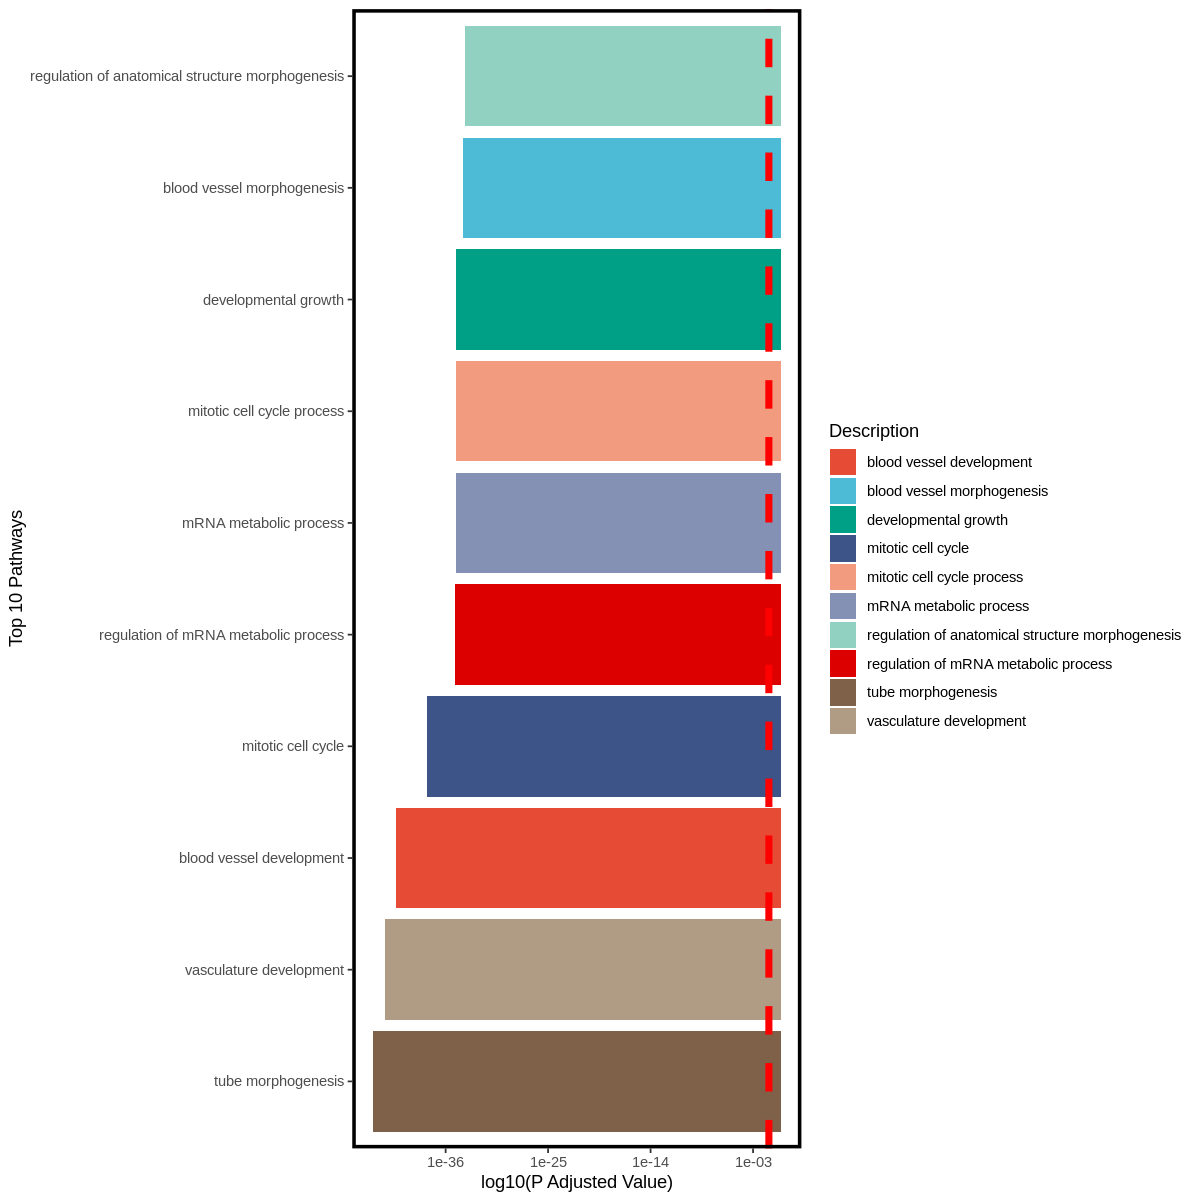

In [143]:
options(repr.plot.width = 10, repr.plot.height = 10)
ggplot(go_1_sub,aes(x = Description, y = p.adjust, fill = Description)) + 
geom_bar(stat = 'identity') +
scale_fill_npg() +
scale_x_discrete(limits = go_1_sub$Description) +
scale_y_continuous(trans = 'log10') +
coord_flip() + 
geom_hline(yintercept=0.05, color = 'red', linetype='dashed', size = 2) + 
xlab('Top 10 Pathways') + ylab('log10(P Adjusted Value)') +
theme_bw() + 
theme(panel.border = element_rect(colour = 'black', size = 2), panel.grid.major = element_blank(),
panel.grid.minor = element_blank())

## Cluster 2

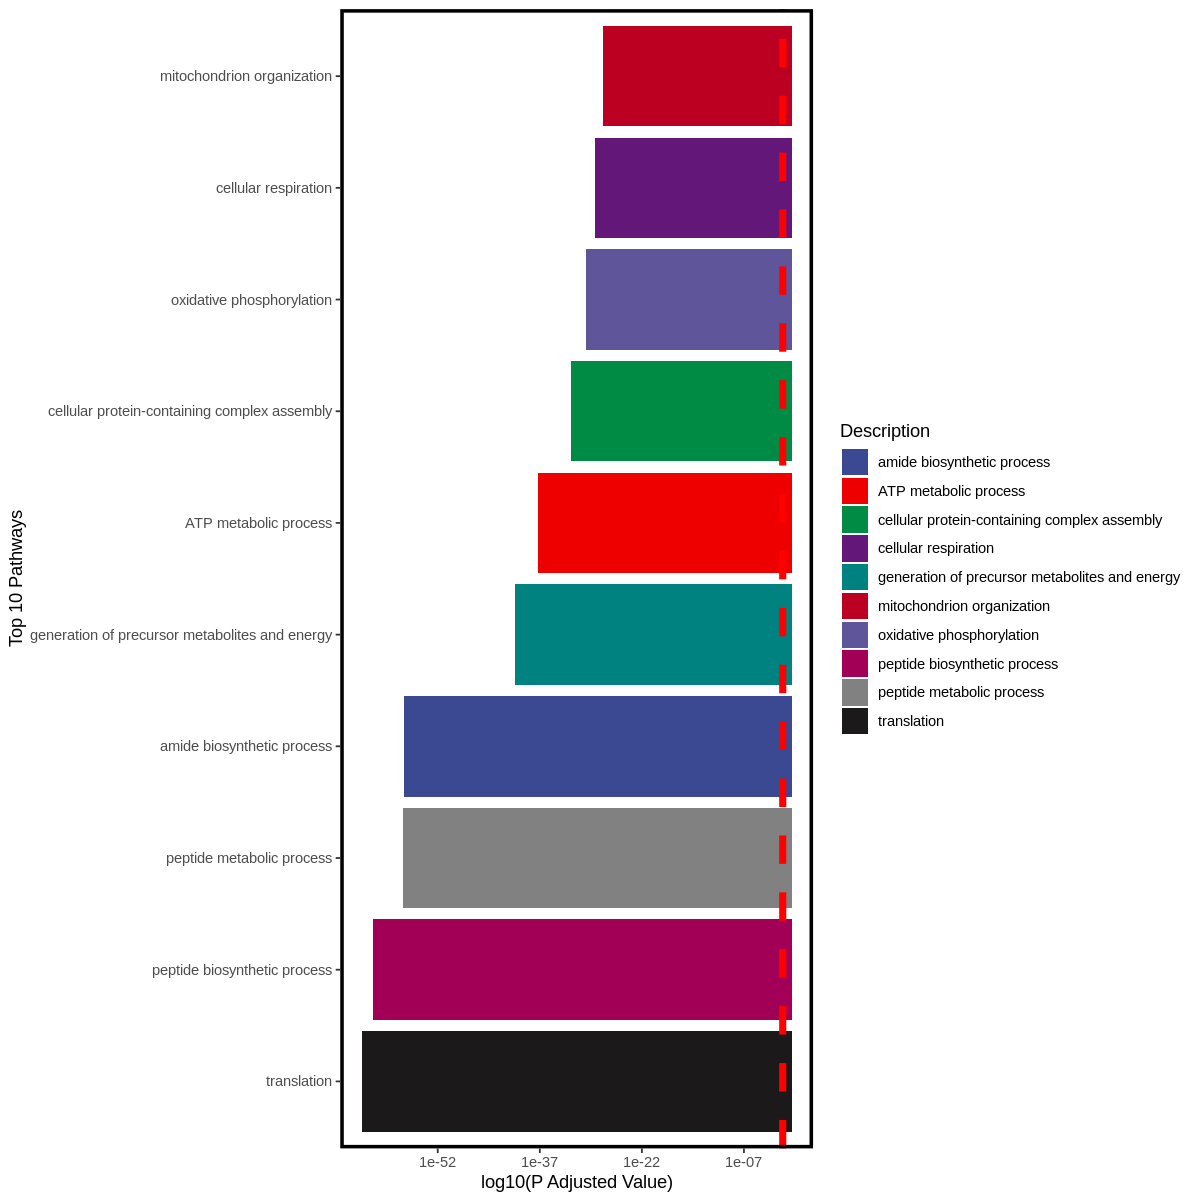

In [142]:
options(repr.plot.width = 10, repr.plot.height = 10)
ggplot(go_2_sub,aes(x = Description, y = p.adjust, fill = Description)) + 
geom_bar(stat = 'identity') +
scale_fill_aaas() +
scale_x_discrete(limits = go_2_sub$Description) +
scale_y_continuous(trans = 'log10') +
coord_flip() + 
geom_hline(yintercept=0.05, color = 'red', linetype='dashed', size = 2) + 
xlab('Top 10 Pathways') + ylab('log10(P Adjusted Value)') +
theme_bw() + 
theme(panel.border = element_rect(colour = 'black', size = 2), panel.grid.major = element_blank(),
panel.grid.minor = element_blank())

We see vasculature and blood vessel development terms enriched in Cluster 1 and not Cluster 2

In [ ]:
sessionInfo()

R version 4.0.5 (2021-03-31)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 18.04.5 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/openblas/libblas.so.3
LAPACK: /usr/lib/x86_64-linux-gnu/libopenblasp-r0.2.20.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] parallel  stats4    stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] Mus.musculus_1.3.1                       
 [2] OrganismDbi_1.32.0                       
 [3] GOfuncR_1.10.0                           
 [4] vioplot_0.3.6                            
 [5] zoo_1.8-9                                
 [6] sm_2.2